# Preparar el problema

## Imports

In [14]:
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns

## Cargar DataSet

In [9]:
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv('/home/user/machinelearning/iris/data/iris.data.csv', sep=',', names=names)
print("Dimensions:", dataset.shape)
dataset.head(4)

Dimensions: (150, 5)


,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa


# Descripción de los datos

## Medidas estadísticas principales

In [5]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Conteo por clases

In [7]:
dataset.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

# Visualización

## Distribución de cada variable

### Caja y bigotes

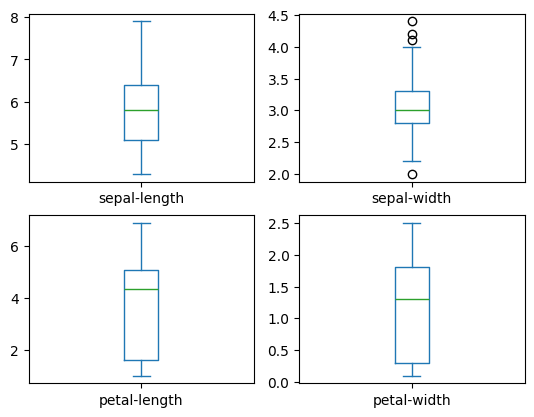

In [12]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

### Histograma

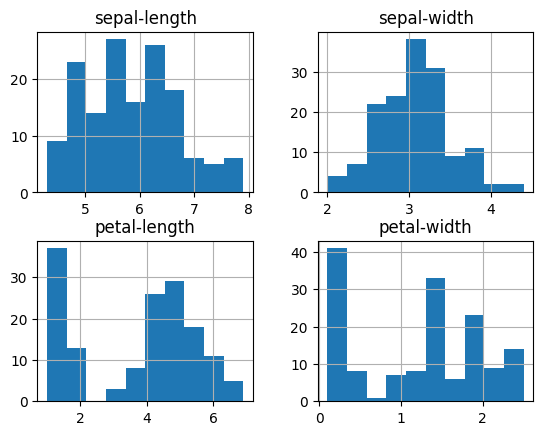

In [13]:
dataset.hist()
pyplot.show()

## Relación entre variables

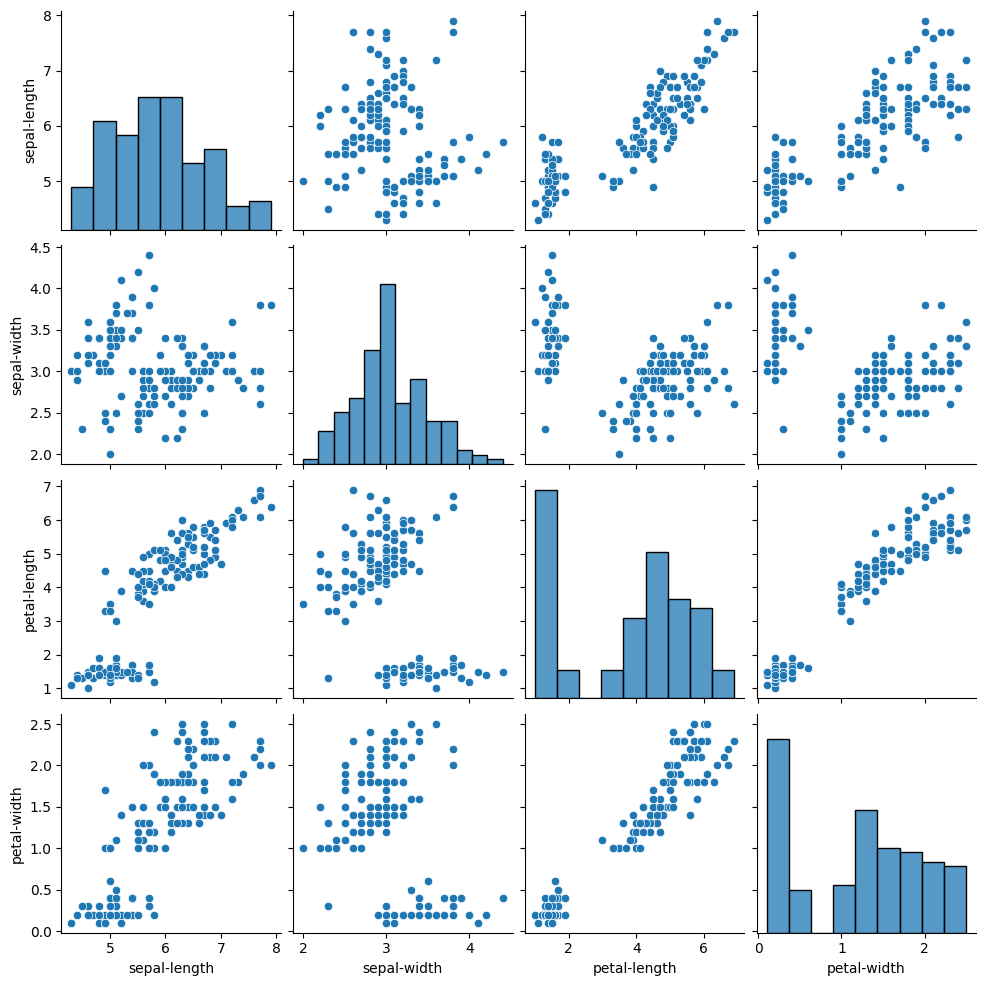

In [18]:
sns.pairplot(data=dataset)
pyplot.show()

# Evaluación de algoritmos

## Separación de los datos

Primero reservaremos una parte de los datos para la validación (20%), usando la otra para el entrenamiento (80%). Con esta separación inicial nos aseguramos que los datos con los que vamos a evaluar el modelo sean totalmente nuevos. Realmente luego en el entrenamiento haremos validación cruzada, que de los datos de entrenamiento irá dejando tmb una sección para validar, pero al final esos datos, aunque sean de test, no son totalmente nuevos.

In [19]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

## Modo de validación

Usamos validación cruzada en k partes (k=10). Nuestra métrica será la precisión (aciertos/total).

## Construcción de modelos

Nos hacemos una lista con los distintos modelos que queremos probar. Recorremos la lista construyéndotelos 

In [22]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.983333 (0.033333)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.958333 (0.076830)
NB: 0.966667 (0.040825)
SVM: 0.983333 (0.033333)


Lo visualizamos con un diagrama de cajas. Vemos que KNN, LR y SVM dan muy buenos resultados

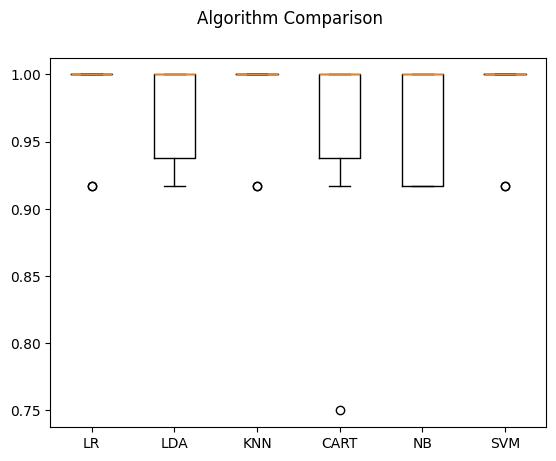

In [23]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Predicciones

Usaremos KNN, ya que ha dado buenos resultados. Usaremos el 20% (los que guardamos al inicio) de los datos para la validación. Al hacerlo de esta manera podemos comprobar que no haya overfitting

In [24]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30

